Повертаючись до розмов про __проблеми__ та __алгоритми__, ми можемо згадати наш приклад для проблеми __пошуку__. Для правильного аналізу задачі ми маємо оцінювати:

* найгіршу складність вирішення __проблеми теоретично__ та __певним алгоритмом__
* найкращу теоретично можливу складність вирішення __проблеми теоретично__ та __певним алгоритмом__
* середній випадок вирішення проблеми __певним алгоритмом__

In [13]:
lst = [i for i in range(10)]

In [14]:
def linear_search(arr, target):
    """Best case O(1)
       Worst case O(n)
       Average O(n)"""
    for index, element in enumerate(arr):
        if element == target:
            return index
    return None


In [15]:
def binary_search(arr, target):
    """Best case O(1)
       Worst case O(log(n))
       Average O(log(n))"""
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return None


Насправді, треба зазначити, що ці два алгоритми вирішують трошки різні проблеми. Лінійний пошук працює навіть з __невідсортованими__ списками. Тоді як бінарний пошук працює тільки коли масив __відсортований__. Також бінарний пошук чутливий до ситуацій, коли ви шукаєте величину, що знаходиться на краю колекції. Лінійний пошук чутливий до ситуацій, коли величина в кінці колекції.

Подробно можна почитати [тут](https://www.freecodecamp.org/news/search-algorithms-linear-and-binary-search-explained/). Окремо зверніть увагу на order agnostic binary search. Сортування все ще важливо; але ми можемо не переживати за його __порядок__

Задача пошуку ми навряд уже покращимо. Але ми можемо вирішити схожу задачу: нехай нам треба не повернути __індекс входження__, а перевірити сам __факт наявності__ елементу в колекції. 

Спойлер: ми можемо це зробити за (майже) О(1) часу.

In [16]:
st = {i for i in range(10)}
# до речі, якою буде складність створення цієї множини? 
# Якою буде складність перетворення множини зі списку та назад?

In [17]:
def linear_search_modified(arr, target):
    """Best case O(1)
       Worst case O(n)
       Average O(n)"""
    for element in arr:
        if element == target:
            return True
    return False


def binary_search_modified(arr, target):
    """Best case O(1)
       Worst case O(log(n))
       Average O(log(n))"""
    left = 0
    right = len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return True
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False


In [18]:
from random import randint

In [19]:
#Протестуйте як для 20, так і для 200000 і вище

NUMS = 2000000

lst = list(range(NUMS))
st = set(range(NUMS))

In [20]:
%%timeit

linear_search_modified(lst, randint(0, NUMS))

34.3 ms ± 8.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
%%timeit

binary_search_modified(lst, randint(0, NUMS))

6.15 µs ± 416 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [22]:
%%timeit

randint(0, NUMS) in st

1.05 µs ± 50.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [23]:
import random

from time import time
from functools import partial
from typing import Callable, Union, List, Iterable

RANGE_BOUND_MAX = 700
TESTS_NUM = 5000

def function_timer(function: Callable):
    start_time = time()
    function()
    return time() - start_time

range_bounds = list(range(10, RANGE_BOUND_MAX))

def time_algs_by_mean(func: Callable, 
                      test_num: int, 
                      range_bounds: List[int], 
                      type_constr: type = list) -> List[float]:
    algorith_times = list()
    for range_bound in range_bounds:
        arr = type_constr(range(range_bound))
        times_for_n: List[float] = [function_timer(
        partial(func,
                arr = arr, 
                target = random.randint(0, range_bound))
        ) for _ in range(test_num)]
        mean_running_time = sum(times_for_n)/len(times_for_n)
        algorith_times.append(mean_running_time)
    return algorith_times

linear_times: List[float] = time_algs_by_mean(linear_search_modified, TESTS_NUM, range_bounds)

binary_times: List[float] = time_algs_by_mean(binary_search_modified, TESTS_NUM, range_bounds)

set_times: List[float] = time_algs_by_mean(lambda arr, target: target in arr, TESTS_NUM, range_bounds, set)

In [24]:
import matplotlib.pyplot as plt

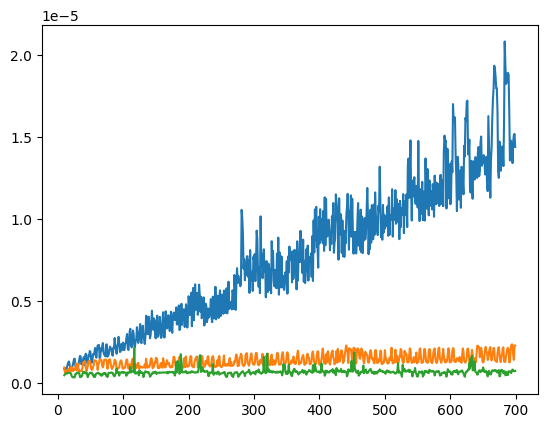

In [25]:
plt.plot(range_bounds, linear_times)
plt.plot(range_bounds, binary_times)
plt.plot(range_bounds, set_times)

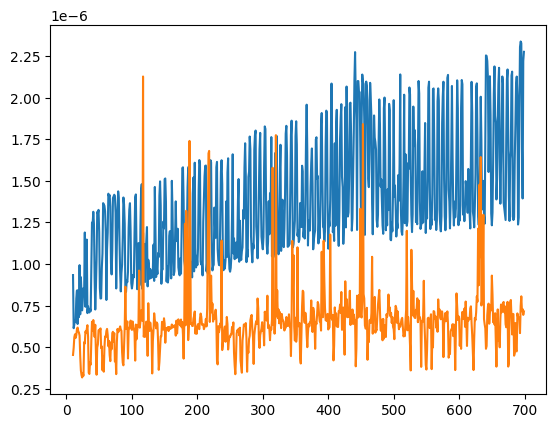

In [26]:
plt.plot(range_bounds, binary_times)
plt.plot(range_bounds, set_times)

За рахунок чого це відбувається? Все тому що set в Python працює на основі структури даних, що носить назву hash table [(ось таблиця її асимптотичної складності)](https://iq.opengenus.org/time-complexity-of-hash-table/). Як ми бачимо, це вражаючі показники: майже всі операції працюють за О(1). Вочевидь, за таку швидкість доводиться платити. Та і подібна асимптотична складність алгоритму є трохи ідеалізованою. 
Давайте розберемо це поглянувши на нативні реалізації хеш-таблиці в Python:

In [ ]:
native_hash_table = {
    "key_1": 1,
    "key_2": 2,
}

In [27]:
yet_another_set = {range(10)}

Виходячи з відомих властивостей словників і множин у Python, ми платимо:
* Порядком (віднедавна словники у Python гарантують порядок, але в тому числі in the sake of readability є сенс використовувати ordered dict коли вам потрібно зберігати порядок ключів)
* Обов'язковою унікальністю кожного елементу (в множині не буває дублікатів)
* Необхідністю мати для кожного ключа **"гарний"** хеш. 

Але що таке **"гарний"** хеш? І які обмеження він у свою чергу накладає на дані?

За визначенням, хеш-функція - це функція, котра будь якому значенню ставить у відповідність

In [ ]:
class HashTable:
    """Ілюстративна реалізація хеш-таблиці. 
    В якості способу розв'язання колізій використовується separate chaining.
    Ця реалізація не є оптимальною, але дозволяє зрозуміти принципи роботи хеш-таблиць.
    В реальних програмах використовуйте dict"""
    def __init__(self, load_factor):
        self.load_factor = load_factor
        self.table = [list() for _ in range(load_factor)]

    def _hash(self, key):
        return hash(key) % self.load_factor

    def insert(self, key, value):
        index = self._hash(key)
        for item in self.table[index]:
            if item[0] == key:
                item[1] = value
                return
        self.table[index].append([key, value])

    def get(self, key):
        index = self._hash(key)
        for item in self.table[index]:
            if item[0] == key:
                return item[1]
        raise KeyError(key)

    def remove(self, key):
        index = self._hash(key)
        for i, item in enumerate(self.table[index]):
            if item[0] == key:
                del self.table[index][i]
                return
        raise KeyError(key)